In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
import cmath
import scipy
from scipy.fftpack import fft, ifft, fftfreq
import scipy.signal

# Serie di Fourier e Trasformate di Fourier
Le serie di Fourier e le trasformate di Fourier permettono di scomporre un segnale in una somma di sinusoidi (o esponenziali complessi). Con questo tipo di scomposizione si dice che un segnale viene rappresentato nel dominio delle frequenze. Per la classe dei segnali periodici tale scomposizione è detta Serie di Fourier, mentre per i segnali non periodici si parla di Trasformate di Fourier.

### Serie di Fourier per segnali discreti periodici
Consideriamo un segnale periodico $x(n)$ con periodo $N,$ tale per cui $x(n)=x(n+N)\forall n$. La rappresentazione in serie di Fourier per $x(n)$ consiste in $N$ funzioni esponenziali armonicamente in relazione tra loro, del tipo
$$
e^{j 2 \pi n \frac{k} {N}}, \quad k=0,1, \ldots, N-1
$$
La scomposizione in serie di Fourier per il segnale periodico $x(n)$ è dunque la seguente (chiamata DTFS, discrete-time Fourier series).
$$
x(n)=\sum_{k=0}^{N-1} c_{k} s_{k}(n) = \sum_{k=0}^{N-1} c_{k} e^{\frac{j 2 \pi k n}{N}}, \quad k=0,1, \ldots, N-1
$$
dove i vari $\{c_{k}\}$ sono i coefficienti della serie. Quella appena scritta è definita <i> equazione di sintesi </i>. Soffermiamoci un secondo sul significato di questa formula. La quantità $e^{\frac{j 2 \pi k n}{N}}$, non è altro che un esponenziale complesso che, all'aumentare del valore $k$, aumenta la propria frequenza. In effetti, per $k=0$, $e^{\frac{j 2 \pi k n}{N}} = 1$, perciò $x(n)$ non è altro che il coefficiente $c_0$ moltiplicato per un segnale unitario. Per $k=1$, invece, il coefficiente $c_1$ viene moltiplicato per un'onda sinusoidale complessa di frequenza pari a $f_1=\frac{1}{N}$, poi per $k=2$ il segnale $x(n)$ sarà pari al coefficiente $c_2$ moltiplicato ad un'onda sinusoidale complessa di frequenza maggiore, ovvero $f_2=\frac{2}{N}$. In conclusione, il segnale $x(n)$ viene espresso come la somma pesata (da coefficienti $c_k$) di sinusoidi di diversa frequenza. Resta da capire come determinare tali coefficienti. 

L'espressione dei coefficienti di Fourier $\{c_{k}\}$ è data dalla seguente formula.
$$
c_{k}=\frac{1}{N} \sum_{n=0}^{N-1} x(n) e^{\frac{-j 2 \pi kn} {N}}, \quad k=0,1, \ldots, N-1
$$
<i>La dimostrazione di quest'ultima formula si trova a pag.242 del libro [1].</i>
Quella appena scritta è definita <i> equazione di analisi </i>. I coefficienti di Fourier $\{c_{k}\}$, $k = 0,1,...,N-1$ ci forniscono la descrizione del segnale $x(n)$ nel dominio delle frequenze, nel senso che $c_{k}$ rappresenta l'amplitudine e la fase associata all'onda sinusoidale complessa $s_k(n)$, che ha appunto frequenza $k$.
$$
s_k(n) = e^{\frac{-j 2 \pi kn} {N}} = e^{-j w_kn} \quad \text{con } w_k = \frac{2\pi k}{N}
$$

Come già visto nel paragrafo "Esponenziali complessi in relazione armonica (a tempo discreto)", le funzioni $s_k(n)$ sono segnali periodici. Vale a dire che 
$$s_k(n) = s_k(n + N)$$ 
Per via di questa periodicità, anche i coefficienti$\{c_{k}\}$, $k = 0,1,...,N-1$ soddisfano la condizione di periodicità. La dimostrazione è molto semplice, ed è la seguente.
<center> $$
c_{k+N}=\frac{1}{N} \sum_{n=0}^{N-1} x(n) e^{\frac{-j 2 \pi k (n+N)} {N}} = \\
= \frac{1}{N} \sum_{n=0}^{N-1} x(n) e^{\frac{-j 2 \pi k n} {N}}e^{-j 2 \pi k} = \\
 \frac{1}{N} \sum_{n=0}^{N-1} x(n) e^{\frac{-j 2 \pi k n} {N}} = c_k
$$ </center>
Riassumendo, coefficienti $\{c_{k}\}$, $k = 0,1,...,N-1$ sono sequenze periodiche di periodo $N$.
$$ c_{k+N}=c_k $$
Perciò, in conclusione, dato un segnale $x(n)$ periodico di periodo $N$, lo spettro di tale segnale è anch'esso periodico di periodo $N$.

Vale la pena notare che il coefficiente $\{c_{0}\}$, nei segnali periodici, ci dice il valore medio del segnale lungo il periodo. In effetti:
$$
c_{0} = \frac{1}{N} \sum_{n=0}^{N-1} x(n)
$$

#### Esempio 1
Determinare lo spettro del seguente segnale.
$$
x(n) = \cos(\frac{\pi n}{3}) = \cos(\frac{2\pi n}{6})
$$
Vediamo che la frequenza fondamentale è $f = \frac{1}{6}$, di conseguenza il periodo fondamentale è $N_0 = \tau = 6$. A questo punto possiamo adottare due tecniche di risoluzione:
<h6>1° Metodo</h6> 
Applico la formula di definizione dei coefficienti e vedo per ogni valore di $k$ qual'è il risultato. Definisco dunque lo spettro $c_{k}$.
$$
c_{k}=\frac{1}{6} \sum_{n=0}^{5} x(n) e^{\frac{-j 2 \pi kn} {6}}, \quad k=0,1, \ldots, 5
$$
A questo punto posso andare a vedere cosa succede sostituendo $k = 0,1, \ldots, 5$. 

- $k = 0 \rightarrow c_{0}=\frac{1}{6} \sum_{n=0}^{5} \cos(\frac{\pi n}{3}) e^{\frac{-j 2 \pi 0 n} {6}}  =\frac{1}{6} \sum_{n=0}^{5} \cos(\frac{\pi n}{3}) =\frac{1}{6}[1 + \frac{1}{2} - \frac{1}{2} - 1 - \frac{1}{2} + \frac{1}{2}] = 0$
- $k = 1 \rightarrow c_{1}=\frac{1}{6} \sum_{n=0}^{5} \cos(\frac{\pi n}{3}) e^{\frac{-j 2 \pi n} {6}} 
= \ldots$
- $k = \ldots$
- $k = 5 = \ldots$

<h6>2° Metodo</h6> 
Applico la formula di Eulero per ottenere una sequenza di esponenziali complessi già scritta sotto forma di serie di Fourier. La formula da applicare è la seguente.
$$ \begin{array}{l}
\cos \left(\omega t+\phi\right)=\frac{1}{2}\left(e^{j\left(\omega t+\phi\right)}+e^{-j\left(\omega t+\phi\right)}\right)
\end{array}$$
Nel caso specifico, si ottiene

$$
x(n)=\cos \frac{2 \pi n}{6}=\frac{1}{2} e^{\frac{j 2 \pi n}{6}}+\frac{1}{2} e^{\frac{-j 2 \pi n}{6}}
$$

Possiamo notare che quella appena scritta è la sequenza già in forma di scomposizione in serie di Fourier. Vale a dire
$$
x(n)=\sum_{k=0}^{N-1} c_{k} s_{k}(n) = \sum_{k=0}^{N-1} c_{k} e^{\frac{j 2 \pi k n}{N}} = \frac{1}{2} e^{\frac{j 2 \pi n}{6}}+\frac{1}{2} e^{\frac{-j 2 \pi n}{6}}
$$
Il che vuol dire che abbiamo $c_{1}=\frac{1}{2}$, e $c_{-1}=\frac{1}{2}$. Andando a logica, $c_{-1}$ corrisponde a $c_{5}$ essendo il periodo $N=5$. Questo lo possiamo dimostrare facilmente se scriviamo la componente esponenziale $e^{-\frac{j 2 \pi n}{6}}$ nel seguente modo:
$$
e^{-j 2 \pi n / 6}=e^{\frac{j 2 \pi(5-6) n} {6}}=e^{\frac{j 2 \pi5 n}{6}}
$$
A questo punto la scomposizione del segnale $x(n)$ la possiamo riscrivere in questo modo.
$$
x(n)=\sum_{k=0}^{N-1} c_{k} s_{k}(n) = \sum_{k=0}^{N-1} c_{k} e^{\frac{j 2 \pi k n}{N}} = \frac{1}{2} e^{\frac{j 2 \pi n}{6}}+\frac{1}{2} e^{\frac{j 2 \pi5 n}{6}}
$$
Risulta a questo punto chiaro che lo spettro del segnale è il seguente.
$$
\begin{array}{l}
c_{0}=c_{2}=c_{3}=c_{4}=0 \\
c_{1}=\frac{1}{2}, \quad c_{5}=\frac{1}{2}
\end{array}
$$
Calcoliamo ora modulo e fase dei coefficienti $c_k$, ovvero modulo e fase dello spettro di $x(n)$.
<center> $$
\text{Modulo }|c_k|\rightarrow \\
|c_{0}|=|c_{2}|=|c_{3}|=|c_{4}|=\sqrt{0^2 + 0^2} = 0\\
 |c_{1}| = |c_{5}|=\sqrt{\frac{1}{2}^2 + 0^2} = \sqrt{\frac{1}{4}} = \frac{1}{2} \\
\text{Fase } \measuredangle c_k \rightarrow \\
\measuredangle c_k \text{ = indefinito per k = 0,2,3,4}\\
\measuredangle c_1 = \measuredangle c_5 = 𝑎𝑟𝑐𝑡𝑔(\frac{0}{\frac{1}{2}}) = 𝑎𝑟𝑐𝑡𝑔(0) = 0
$$ </center>

Frequenza = 0.17 cicli/unità_tempo = 0.17 Hz


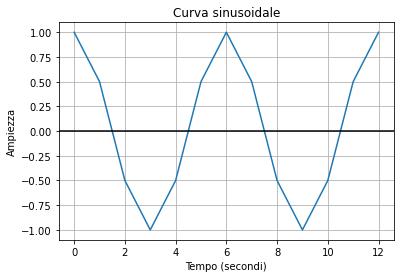

In [2]:
fs = 1
n = np.arange(0.0, 13, 1/fs)
f = (1/6)
f_hz = f/n[1]
print('Frequenza = {} cicli/unità_tempo = {} Hz'.format(np.round(f, 2), np.round(f_hz, 2)))
x_n = np.cos(2*np.pi*n*f_hz)
plt.plot(n, x_n)
plt.title('Curva sinusoidale')
plt.xlabel('Tempo (secondi)')
plt.ylabel('Ampiezza')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

Proviamo a ricostruire l'onda scomponendola e ricomponendola. Abbiamo visto nell'esempio numerico che tale sengale può essere espresso come la somma pesata (con i coefficienti $c_1$ e $c_5$) di due esponenziali complessi.
$$
x(n) = c_1 e^{j 2 \pi f_1 n}+ c_5 e^{j 2 \pi f_5 n} = \frac{1}{2} e^{\frac{j 2 \pi n}{6}}+\frac{1}{2} e^{\frac{j 2 \pi 5 n}{6}}
$$

In [12]:
n

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

C:\Users\Giobi\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


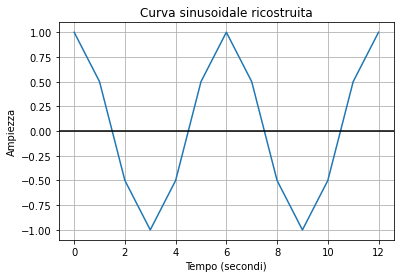

In [10]:
N = 6
f_0 = 0/N
f_1 = 1/N
f_2 = 2/N
f_3 = 3/N
f_4 = 4/N
f_5 = 5/N
x_complex_1 = np.cos(2*np.pi*f_1*n) + 1j*np.sin(2*np.pi*f_1*n)
x_complex_5 = np.cos(2*np.pi*f_5*n) + 1j*np.sin(2*np.pi*f_5*n)
c_0, c_2, c_3,c_4 = 0, 0, 0, 0
c_1 = 1/2
c_5 = 1/2
fourier_series = c_1*x_complex_1 + c_5*x_complex_5
plt.plot(n, fourier_series)
#plt.plot(n, fourier_series.imag, 'h')
plt.title('Curva sinusoidale ricostruita')
plt.xlabel('Tempo (secondi)')
plt.ylabel('Ampiezza')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

Andiamo a rappresentare graficamente il modulo dello spettro per ogni frequenza $f_k = \frac{k}{N}, k = 0,1,...,N-1$ associata al coefficiente $c_k$, con $N$ = 6. La fase non la rappresentiamo essendo non definita in tutti i punti ad eccezione di $k = 1$ e $k= 5$ in cui la fase è nulla. Sull'asse delle ascisse ci mettiamo la frequenza espressa in cicli per unità di tempo, piuttosto che il semplice valore $k$, che da solo assumerebbe poco sgnificato. Notiamo che il modulo equivale al valore dei coefficienti, quindi non c'è bisogno di ridefinire nuove variabili.

La retta in rosso tratteggiata rappresenta il maggior valore che può assumere la frequenza espressa in cicli per unità di tempo. Come sappiamo, ogni valore di $f > \frac{1}{2}$ è una frequenza alias di una frequenza minore. Qui tra l'altro si verifica la mia supposizione (che avevo fatto nell'Esempio 2, Proprietà delle onde sinusoidali - Notebook 01) in cui scrivevo:
$$
cos(2\pi(f_{lim} + x)n) = cos(2\pi(f_{lim} - x)n)
$$
Qui nel nostro caso non abbiamo il coseno, perchè il coefficiente di Fourier è espresso attraverso esponenziali complessi. Però anche in questo caso vediamo che:
$$
f_{lim} = 0.5 \\
f_{lim} - 0.33 = f_1 = 0.17 \rightarrow c_1 = 0.5\\
f_{lim} + 0.33 = f_5 = 0.83 \rightarrow c_5 = 0.5
$$

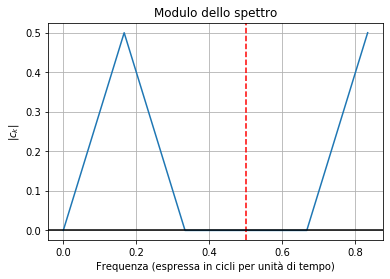

In [50]:
freqs = [f_0, f_1, f_2, f_3, f_4, f_5]
c_k = [c_0, c_1, c_2, c_3, c_4, c_5]
plt.plot(freqs, c_k)
plt.axvline(x=0.5, color='r', ls='--')
plt.title('Spettro di ampiezza')
plt.xlabel('Frequenza (espressa in cicli per unità di tempo)')
plt.ylabel('$|c_k|$')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

Effettivamente dire che $f_5$ = 0.83 non ha molto senso. Avrebbe più senso ricercare la frequenza espressa in cicli per unità di tempo nell'intervallo $-\frac{1}{2} \leq f \leq \frac{1}{2}$. Visto che abbiamo dimostrato come:
$$ c_{k+N}=c_k $$
Allora potremmo ndare a riscrivere i coefficienti $c_4$ e $c_5$, che corrispondono a frequenza maggiori di $f_{lim} = 0.5$, come $c_{4-6} = c_{-2}$ e $c_{5-6} = c_{-1}$.

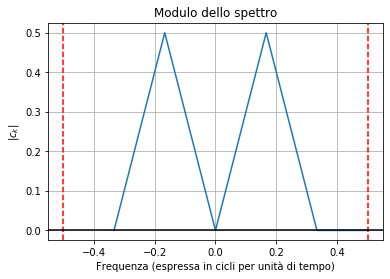

In [52]:
f_m2 = -2/N
f_m1 = -1/N
c_m1 = c_5
c_m2 = c_4
freqs = [f_m2, f_m1, f_0, f_1, f_2, f_3]
c_k = [c_m2, c_m1, c_0, c_1, c_2, c_3]
plt.plot(freqs, c_k)
plt.axvline(x=-0.5, color='r', ls='--')
plt.axvline(x=0.5, color='r', ls='--')
plt.title('Spettro di ampiezza')
plt.xlabel('Frequenza (espressa in cicli per unità di tempo)')
plt.ylabel('$|c_k|$')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

Proviamo a vedere se fft di scipy calcola gli stessi coefficienti.. dai risultati non sembra.

In [55]:
c_k = fft(x_n)
freqs = fftfreq(len(x_n), 1.0/fs)
c_k

array([ 1.00000000e+00+0.j        ,  1.22287362e+00+0.30141128j,
        5.75946001e+00+3.0227978j , -7.38237810e-01-0.65402163j,
       -1.88799269e-01-0.27352296j, -5.03578468e-02-0.13278273j,
       -4.93870360e-03-0.04067388j, -4.93870360e-03+0.04067388j,
       -5.03578468e-02+0.13278273j, -1.88799269e-01+0.27352296j,
       -7.38237810e-01+0.65402163j,  5.75946001e+00-3.0227978j ,
        1.22287362e+00-0.30141128j])

#### Ci metto il ? nell'asse y. Suppongo sia $c_k$ ma visto che i risultati non tornano....

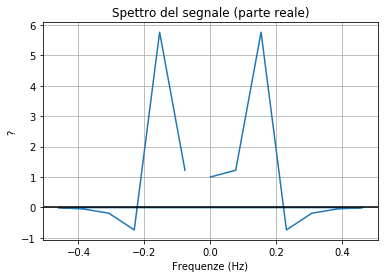

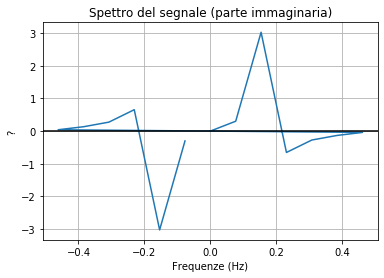

In [57]:
plt.plot(freqs, c_k.real)
plt.title('Spettro di frequenza (parte reale)')
plt.xlabel('Frequenze (Hz)')
plt.ylabel('?')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()
plt.plot(freqs, c_k.imag)
plt.title('Spettro di frequenza (parte immaginaria)')
plt.xlabel('Frequenze (Hz)')
plt.ylabel('?')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

### Perchè i risultati di questo esempio non tornano? Forse la causa è fft, probabilmente il calcolo non è lo stesso di quello che ho fatto io. Vediamo se andando avanti capisco il motivo. 

#### Esempio 2
Determinare lo spettro del seguente segnale $x(n)$ che è periodico con periodo $N=4$.
$$
    x(n) = \{1,1,0,0\} \qquad \text{ con } N = 0,1,2,3
$$
Applicando la formula di definizione dei coefficienti $c_k$ si ottiene:
$$
c_{k}=\frac{1}{4} \sum_{n=0}^{3} x(n) e^{-\frac{j 2 \pi k n}{4}}, \quad k=0,1,2,3
$$

Sostituendo i valori di $x(n)$ nella sommatoria, la formula si può riscrivere nel seguente modo.

<center> $$
\frac{1}{4} \sum_{n=0}^{3} x(n) e^{-\frac{j 2 \pi k n}{4}} = 
\frac{1}{4}[ e^{-\frac{j 2 \pi k 0}{4}} +  e^{-\frac{j 2 \pi k 1}{4}}] =
\frac{1}{4}[1 +  e^{-\frac{j 2 \pi k}{4}}] = \frac{1}{4}\left(1+e^{-j \pi k / 2}\right)
$$ </center>
Perciò alla fine abbiamo:
$$
c_{k}=\frac{1}{4}\left(1+e^{-j \pi k / 2}\right), \quad k=0,1,2,3
$$
Sostituendo i vari valori $k=0,1,2,3$, si ottiene:
$$
c_{0}=\frac{1}{2}, \quad c_{1}=\frac{1}{4}(1-j), \quad c_{2}=0, \quad c_{3}=\frac{1}{4}(1+j)
$$
Calcoliamo ora modulo e fase dei coefficienti $c_k$, ovvero modulo e fase dello spettro di $x(n)$.
<center> $$
\text{Modulo }|c_k|\rightarrow \\
|c_0| = \frac{1}{2},\quad |c_1| =\frac{\sqrt{2}}{4},\quad |c_2| =0,\quad |c_3| =\frac{\sqrt{2}}{4} \\
\text{Fase } \measuredangle c_k \rightarrow \\
\measuredangle c_0 = 0,\quad \measuredangle c_1 = \frac{\pi}{4},\quad \measuredangle c_2 = \text{indefinito},\quad \measuredangle c_3 = -\frac{\pi}{4},
$$ </center>

In [26]:
def f(n):
    l1 = np.arange(0, n+1, 4)
    l2 = np.arange(1, n+1, 4)
    if n in l1:
        out = 1
    elif n in l2:
        out = 1
    else:
        out = 0
    return out
def calc_x_n(n):
    return np.vectorize(f)(n)

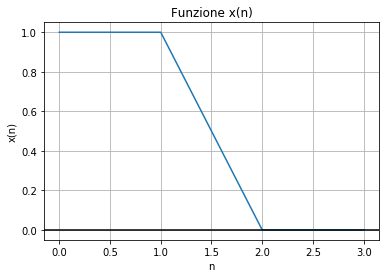

In [27]:
L = 3
n = np.linspace(0,L, L+1)
x_n = calc_x_n(n)
plt.plot(n, x_n)
plt.title('Funzione x(n)')
plt.xlabel('n')
plt.ylabel('x(n)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

Procediamo con la ricostruzione del segnale attraverso la serie di Fourier.

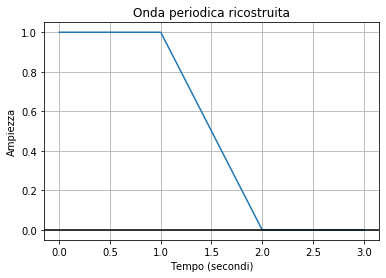

In [28]:
N = 4
f_0 = (0)/N
f_1 = (1)/N
f_2 = (2)/N
f_3 = (3)/N
x_complex_0 = np.cos(2*np.pi*f_0*n) + 1j*np.sin(2*np.pi*f_0*n)
x_complex_1 = np.cos(2*np.pi*f_1*n) + 1j*np.sin(2*np.pi*f_1*n)
x_complex_2 = np.cos(2*np.pi*f_2*n) + 1j*np.sin(2*np.pi*f_2*n)
x_complex_3 = np.cos(2*np.pi*f_3*n) + 1j*np.sin(2*np.pi*f_3*n)
c_0 = 1/2
c_1 = 1/4*(1-1j)
c_2 = 0
c_3 = 1/4*(1+1j)
fourier_series = c_0*x_complex_0 + c_1*x_complex_1 + c_2*x_complex_2 + c_3*x_complex_3
plt.plot(n, fourier_series)
plt.title('Onda periodica ricostruita')
plt.xlabel('Tempo (secondi)')
plt.ylabel('Ampiezza')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

Andiamo ora a rappresentare graficamente modulo e fase dello spettro.

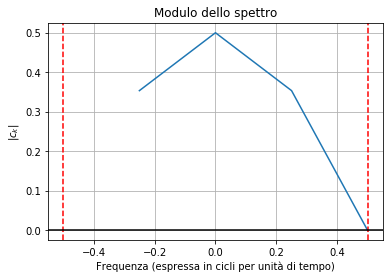

In [45]:
f_m1 = (3-N)/N
freqs = [f_m1, f_0, f_1, f_2]

mod_c_0 = 1/2
mod_c_1 =  np.sqrt(2)/4
mod_c_2 = 0
mod_c_3 =  np.sqrt(2)/4
mod_cm1 = mod_c_3
mod_c_k = [mod_cm1, mod_c_0, mod_c_1, mod_c_2]

plt.plot(freqs, mod_c_k)
plt.axvline(x=-0.5, color='r', ls='--')
plt.axvline(x=0.5, color='r', ls='--')
plt.title('Spettro di ampiezza')
plt.xlabel('Frequenza (espressa in cicli per unità di tempo)')
plt.ylabel('$|c_k|$')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

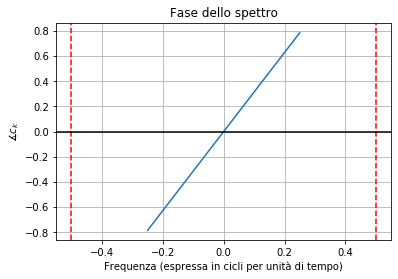

In [46]:
ph_c_0 = 0
ph_c_1 = np.pi/4
ph_c_2 = np.nan
ph_c_3 = -np.pi/4
ph_cm1 = ph_c_3

ph_c_k = [ph_cm1, ph_c_0, ph_c_1, ph_c_2]

plt.plot(freqs, ph_c_k)
plt.axvline(x=-0.5, color='r', ls='--')
plt.axvline(x=0.5, color='r', ls='--')
plt.title('Spettro di fase')
plt.xlabel('Frequenza (espressa in cicli per unità di tempo)')
plt.ylabel('$\measuredangle c_k$')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

In [63]:
ck = fft(x_n)
ck

array([2.+0.j, 1.-1.j, 0.+0.j, 1.+1.j])

### Anche in questo caso i valori con fft non tornano. Come mai??

#### Potenza, Energia, Relazione di Perseval, Power Density Spectrum per segnali periodici
Abbiamo visto che, un segnale $x(n)$ di periodo $N$ è un segnale potenza, con potenza media pari alla potenza media in un singolo periodo. Ovvero:
$$
P_x = \frac{1}{N}\sum_{n=0}^{N-1}|x(n)|^2
$$
Andando a scomporre $x(n)$ in serie di Fourier, otteniamo:
$$
\begin{aligned}
P_{x} = \frac{1}{N}\sum_{n=0}^{N-1}|x(n)|^2&=\frac{1}{N} \sum_{n=0}^{N-1} x(n) x^*(n) =\frac{1}{N} \sum_{n=0}^{N-1} x(n)\left(\sum_{k=0}^{N-1} c_{k}^* e^{-\frac{j 2 \pi k n} {N}}\right)
\end{aligned}
$$

<i> NB: $|x(n)|^2 = x(n) x^*(n)$ vuol dire che il segnale è complesso, ovvero che $x(n) \in \mathbb{C}$. Perciò $|x(n)|^2 = x(n) x(n)$ avviene se e solo se $x(n)\in \mathbb{R}$.</i>

Visto che abbiamo dimostrato che anche i coefficienti $\{c_{k}\}$, $k = 0,1,...,N-1$ sono sequenze periodiche di periodo $N$, possiamo calcolare la potenza media di tali coefficienti lungo il periodo.
$$
\begin{aligned}
P_{c_k} =\frac{1}{N}\sum_{k=0}^{N-1}\left|c_{k}\right|^{2} =\frac{1}{N}\sum_{k=0}^{N-1} c_{k}^*\left[\frac{1}{N} \sum_{n=0}^{N-1} x(n) e^{-\frac{j 2 \pi k n} {N}}\right] = \frac{1}{N}P_{x}
\end{aligned}
$$
A questo punto risulta chiara la <i> Relazione di Perseval </i>.

$$
P_{x} =\frac{1}{N} \sum_{n=0}^{N-1}|x(n)|^{2} = \sum_{k=0}^{N-1}\left|c_{k}\right|^{2}
$$
Questo vuol dire che la potenza del segnale $x(n)$, periodico di periodo $N$, non è altro che la somma delle componenti $\{c_{k}\}$ al quadrato, per $k = 0,1,...,N-1$. 

La sequenza $|c_k|^2$ per $k = 0,1,...,N-1$ è invece detta <i> power density spectrum (o power spectral density o power spectrum), PSD </i>.  La power density spectrum è una sequenza reale, vale a dire che $|c_k|^2 \in \mathbb{R}$. In effetti, anche se la sequenza di coefficienti di Fourier $|c_k|$ fosse composta da unità immaginarie $j$, essendo elevata al quadrato, diventerebbe -1 che è un numero intero. Una conseguenza di ciò, è che la power density spectrum $|c_k|^2$ per $k = 0,1,...,N-1$ non contiene informazioni sulla fase. Effettivamente, dato un numero complesso $z = a + jb$, se $b = 0$, e $a>0$ (quest'ultima condizione si verifica in quanto ogni coefficiente $c_k$ è elevato al quadrato) allora la fase è nulla o non definita (solo se $a=b=0$). 

Se siamo invece interessati all'energia della sequenza $x(n)$ nel singolo periodo, possiamo invece ottenerla attraverso la seguente relazione:
$$
E_{N}=\sum_{n=0}^{N-1}|x(n)|^{2}=N \sum_{k=0}^{N-1}\left|c_{k}\right|^{2}
$$

##### Nella definizione di Energia (Notebook 01- Energia e potenza del segnale) c'è scritto che "Se l'energia è finita, la potenza è nulla". In questo caso però, energia e potenza sono in combinazione lineare. C'è qualcosa che non torna. Nel libro [1] l'energia e la potenza sono definiti a pag. 45, la potenza per segnali periodici a pag. 48, e queste formule appena scritte a pag. 246

### Serie di Fourier per segnali periodici reali
Se $x(n)$ è reale (ovvero se $x^{*}(n)=x(n)),$ allora si può dimostrare che:
$$
c_{k}^{*}=c_{-k}
$$
o, equivalentemente:
- $\left|c_{-k}\right|=\left|c_{k}\right| \quad$ (simmetria pari)
- $\measuredangle  c_{-k}= \measuredangle c_{k} \quad$ (simmetria dispari)

Da queste relazioni otteniamo che:
$$
\left|c_{k}\right|=\left|c_{N-k}\right|
$$
e
$$
\measuredangle  c_{k}=- \measuredangle  c_{N-k}
$$
Più nello specifico, abbiamo:

<center> $$
|c_0| = |c_N|, \qquad \measuredangle  c_{0}=- \measuredangle  c_{N0} = 0 \\
|c_1| = |c_1|, \qquad \measuredangle  c_{1}=- \measuredangle  c_{N-1} \\
|c_\frac{N}{2}| = |c_\frac{N}{2}|, \qquad \measuredangle  c_{\frac{N}{2}}= 0 \quad \text{ se $N$ è pari}\\
|c_\frac{N-1}{2}| = |c_\frac{N+1}{2}|, \qquad \measuredangle  c_{\frac{N-1}{2}}= -c_{\frac{N+1}{2}} \quad \text{ se $N$ è dispari}\\
$$ </center>

A questo punto risulta chiaro che se il segnale è reale, ovvero se $x(n) \in \mathbb{R}$, allora lo spettro $c_{k}, k=0,1, \ldots, \frac{N}{2}$ per $N$ pari, o $k=0$ $1, \ldots,\frac{N-1}{2}$ per $N$ dispari, definisce completamente il segnale nel dominio delle frequenze. Questo risultato non sorprende. Effettivamente è in linea con il fatto che il maggior valore che può assumere $\omega$ in un segnale discreto è $\pi$, ovvero che $|\omega|<\pi .$ Perciò:
$$
-\pi \leq \omega \leq \pi \qquad \rightarrow \qquad 0 \leq \omega \leq 2\pi \qquad \rightarrow \qquad 0 \leq \frac{2\pi k}{N} \leq 2\pi \qquad \rightarrow \qquad 0 \leq k \leq \frac{N}{2}
$$

Se dunque $x(n)$ è un segnale periodico di periodo $N$ ed è reale, allora si può riscrivere la serie di Fourier nel seguente modo (utilizzando le proprietà di simmetria dei coefficienti).
$$
\begin{aligned}
x(n) &=c_{0}+2 \sum_{k=1}^{L}\left|c_{k}\right| \cos \left(\frac{2 \pi}{N} k n+\theta_{k}\right) \\
&=a_{0}+\sum_{k=1}^{L}\left(a_{k} \cos \frac{2 \pi}{N} k n-b_{k} \sin \frac{2 \pi}{N} k n\right)
\end{aligned}
$$
dove 

$a_{0}=c_{0}, \quad a_{k}=2\left|c_{k}\right| \cos \theta_{k}, \quad b_{k}=2\left|c_{k}\right| \sin \theta_{k} \quad  L=\begin{cases} \frac{N}{2} \mbox{ se } \mbox{ $N$ è pari} \\ \frac{N-1}{2} \mbox{ se } \mbox{ $N$ è dispari} \end{cases}$


Di tutta questa formula dobbiamo soffermarci sulla sommatoria, che come vediamo va da 1 a $\frac{N}{2}$ (o $\frac{N-1}{2}$ se $N$ è dispari). In pratica questa formula ci sta dicendo quello che avevamo già notato nei primi due esempi del paragrafo "Serie di Fourier per segnali discreti periodici", ovvero che, in un segnale reale e periodico, abbiamo bisogno di calcolare solo i primi $\frac{N}{2}$ coefficienti $c_k$ per conoscere gli altri $\frac{N}{2}$ coefficienti. Questo perchè la frequenza massima (espressa in cicli per unità di tempo), è pari a 0.5. Perciò se ad esempio N = 4, allora abbiamo bisogno di calcolare i primi due coefficienti, $c_1$ e $c_2$, perchè la frequenza massima è $f_{lim} = \frac{k}{N} = \frac{2}{4}$ che la otteniamo proprio con $k = 2$. Una volta ricavati i primi due coefficienti, possiamo risalire anche a $c_3$, che sarà pari a $c_{3-4} = c{-1}$. A quel punto, se conosco $c{-1}$, posso ricavare il modulo e la fase di $c{-1}$ grazie alle proprietà di simmetria definite prima.

#### Esempio - Power density spectrum 
Andiamo a calcolare la Power density spectrum sulla seguente onda sinusoidale complessa.
$$
\begin{align}
x(n) = e^{j(2\pi f n)} \qquad f = \frac{1}{3} \text{ cicli/unità_tempo }
\end{align}
$$
Per prima cosa, calcoliamo i coefficienti. Essendo $N = 3$, se il segnale fosse stato reale, ci bastava calcolare i primi $\frac{N-1}{2}$ coefficienti, ovvero ne dovevamo calcolare uno solo. Il segnale non è reale, perciò dobbiamo calcolare tutti e tre i coefficienti.
$$
c_0 = \frac{1}{3}\sum_{n=0}^2 e^{j(2\pi n \frac{1}{3})}e^{\frac{-j 2 \pi 0 n} {N}} = \frac{1}{3}\sum_{n=0}^2e^{j(2\pi n \frac{1}{3})} = \frac{1}{3}\sum_{n=0}^2[\cos(2\pi n \frac{1}{3}) + j\sin(2\pi n \frac{1}{3})] = 0 + 0j \\
c_1 = \frac{1}{3}\sum_{n=0}^2 e^{j(2\pi n \frac{1}{3})}e^{\frac{-j 2 \pi 1 n} {N}} = 1 +0j \\
c_2 = \frac{1}{3}\sum_{n=0}^2 e^{j(2\pi n \frac{1}{3})}e^{\frac{-j 2 \pi 2 n} {N}} = 0 + 0j \\
$$
Ovviamente i valori di $c_k$ sono quelli appena scritti... basta vedere che la ricostruzione con serie di Fourier (formula di sintesi) è esattamente il segnale così come l'ho scritto essendo l'unico coefficiente non nullo quello con $k = 1$, ovvero $c_1 = 1$.
Il modulo di questo segnale è il seguente:
$$
|c_0| = 0, |c_1| = 1, |c_2| = 0
$$
La fase è invece:
$$
\measuredangle c_0 = NA, \measuredangle c_1 = NA, \measuredangle c_2 = NA
$$
Infine, la power density spectrum è:
$$
|c_0|^2 = 0, |c_1|^2 = 1, |c_2|^2 = 0
$$

In ogni caso, vediamo anche graficamente quello che avevamo detto: ovvero che la parte immaginaria della power density spectrum è nulla.

Frequenza = 0.33 cicli/unità_tempo = 0.33 Hz


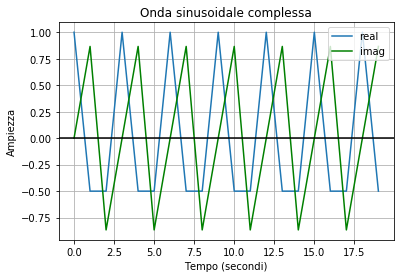

In [96]:
A = 1
fs = 1
n = np.arange(0.0, 20, 1/fs)
f = 1/3
f_hz = f/n[1]
print('Frequenza = {} cicli/unità_tempo = {} Hz'.format(np.round(f, 2), np.round(f_hz, 2)))
phi = 0
x_complex = A*np.cos(2*np.pi*f_hz*n + phi) + 1j*A*np.sin(2*np.pi*f_hz*n + phi)
plt.plot(n, x_complex.real, label = 'real')
plt.plot(n, x_complex.imag, 'green', label = 'imag')
plt.title('Onda sinusoidale complessa')
plt.xlabel('Tempo (secondi)')
plt.ylabel('Ampiezza')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.legend(loc='upper right')
plt.show()

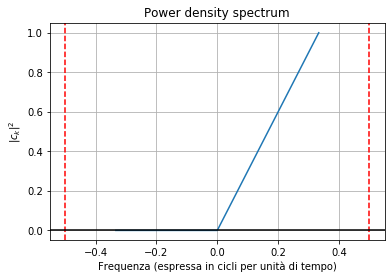

In [97]:
N = 3
f_0 = (0)/N
f_1 = (1)/N
f_2 = (2)/N
f_m1 = (2-3)/N
c_0 = 0
c_1 = 1
c_2 = 0
c_m1 = c_2
freqs = [f_m1, f_0, f_1]
c_k = [c_m1, c_0, c_1]
plt.plot(freqs, c_k)
plt.axvline(x=-0.5, color='r', ls='--')
plt.axvline(x=0.5, color='r', ls='--')
plt.title('Power density spectrum')
plt.xlabel('Frequenza (espressa in cicli per unità di tempo)')
plt.ylabel('$|c_k|^2$')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

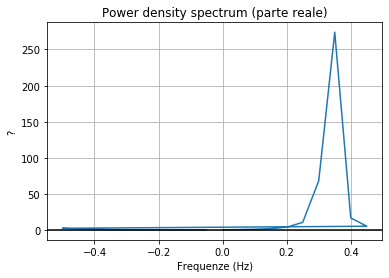

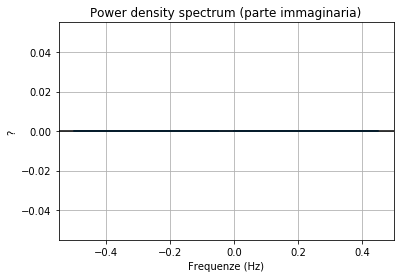

In [101]:
ck = fft(x_complex)
power_density_spectrum = np.square(np.abs(ck))
freqs = fftfreq(len(x_complex), 1.0/fs)
plt.plot(freqs, power_density_spectrum.real)
plt.title('Power density spectrum (parte reale)')
plt.xlabel('Frequenze (Hz)')
plt.ylabel('?')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()
plt.plot(freqs, power_density_spectrum.imag)
plt.title('Power density spectrum (parte immaginaria)')
plt.xlabel('Frequenze (Hz)')
plt.ylabel('?')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

#### Esempio - Serie di Fourier su un'onda quadra periodica. (non penso sia quadra, perchè credo che le onde quadre abbiano punti di discontinuità. Credo piuttosto che semplicemente la forma dell'onda che rappresento sia squadrata).
Consideriamo un'onda quadra di periodo $N$, che nell'intervallo $n \in [0, N-1]$, assume valore $A$ per valori di $n \in [0, L-1]$, e valori nulli altrimenti. In questo esempio assumiamo che $N = 9, L = 5$. Il segnale $x(n)$ è dunque quello rappresentato in figura.
![](https://cdn.mathpix.com/snip/images/MteUvaT8fQk8lp_EPJcNyO4WoCdYCiN7tnsi_sdBDPw.original.fullsize.png)
Formalmente, possiamo definire il segnale $x(n)$ nel seguente modo:
$$
x(n)=\begin{cases} A \quad \mbox{ se } \mbox{ n} \in [0+mN, L-1+mN] \\ 0 \quad \mbox{ altrimenti} \end{cases} \quad \text{con }m \in \mathbb{Z}
$$
Per determinare i coefficienti della serie di Fourier, consideriamo la definizione di $c_k$. Applicando la formula di definizione dei coefficienti $c_k$ si ottiene:
<center>$$
c_{k}=\frac{1}{N} \sum_{n=0}^{N-1} x(n) e^{-\frac{j 2 \pi k n}{N}} = 
\frac{1}{N} \sum_{n=0}^{L-1} A e^{-\frac{j 2 \pi k n}{N}} + \frac{1}{N} \sum_{n=L}^{N} A e^{-\frac{j 2 \pi k n}{N}} = \\
= \frac{1}{N} \sum_{n=0}^{L-1} A e^{-\frac{j 2 \pi k n}{N}}, \quad k=0,1, \ldots, N-1
$$</center>

Quella appena scritta è una somma geometrica. Per ogni somma geometrica vale la seguente relazione.
$$
\sum_{n=0}^{N-1} a^{n}=\left\{\begin{array}{ll}
N, & a=1 \\
\frac{1-a^{N}}{1-a}, & a \neq 1
\end{array}\right.
$$
Possiamo utilizzare tale scomposizione anche nel nostro esempio, ottenendo quanto segue
$$
c_{k}=\frac{A}{N} \sum_{n=0}^{L-1}\left(e^{-\frac{j 2 \pi k}{N}}\right)^{n}=\left\{\begin{array}{ll}
\frac{A L}{N}, & k=0 \\
\frac{A}{N} \frac{1-e^{-\frac{j 2 \pi k L} {N}}}{1-e^{-\frac{j 2 \pi k} {N}}}, & k=1,2, \ldots, N-1
\end{array}\right.
$$
Alcune quantità possono essere semplificate (dimostrazione pag 248 libro [1]). Ad esempio
$$
\begin{aligned}
\frac{1-e^{-\frac{j 2 \pi k L}{N}}}{1-e^{-\frac{j 2 \pi k}{N}}} = e^{- \frac{j \pi k(L-1)}{N}} \frac{\sin (\frac{\pi k L}{ N})}{\sin (\frac{\pi k}{N})}
\end{aligned}
$$
Perciò,
$$
c_{k}=\left\{\begin{array}{ll}
\frac{A L}{N}, & k=0,+N, \pm 2 N, \ldots \\
\frac{A}{N} e^{- \frac{j \pi k(L-1)}{N}} \frac{\sin (\frac{\pi k L}{ N})}{\sin (\frac{\pi k}{N})}, & \text { altrimenti }
\end{array}\right.
$$
La power density spectrum del segnale è
$$
\left|c_{k}\right|^{2}=\left\{\begin{array}{ll}
\left(\frac{A L}{N}\right)^{2}, & k=0,+N, \pm 2 N, \ldots \\
\left(\frac{A}{N}\right)^{2}\left(\frac{\sin (\frac{\pi k L}{ N})}{\sin (\frac{\pi k}{N})}\right)^{2}, & \text { altrimenti }
\end{array}\right.
$$
Per $N = 9, A = 2$ e $L = 5$, i coefficienti di Fourier hanno i seguenti valori:
<center> $$
c_0 = \frac{2*5}{9} = 1.11, \qquad \\
c_1 =  \frac{2}{9}e^{- \frac{j \pi 1*(5-1)}{9}}\left(\frac{\sin (\frac{\pi 1*5}{9})}{\sin (\frac{\pi*1}{9})}\right) = 0.63e^{- j 1.39} =  0.63[\cos(1.39) + j\sin(1.39)] = 0.11 - 0.63j, \qquad c_2 = 0.11 - 0.04j, \qquad c_3 = 0.11 - 0.19j, \qquad c_4 = 0.11+0.09j, \qquad c_5 = 0.11-0.09j, \qquad c_6 = 0.11+0.19j, \qquad c_7 = 0.11-0.04j, \qquad c_8 = 0.11+0.63j.
$$ </center>
La power density spectrum è invece la seguente.
<center> $$
|c_0|^2 = \left(\frac{2*5}{9}\right)^{2} = 1.23, \qquad 
|c_1|^2 =  \left(\frac{2}{9}\right)^{2}\left(\frac{\sin (\frac{\pi 1*5}{9})}{\sin (\frac{\pi*1}{9})}\right)^{2} = 0.41, \qquad |c_2|^2 = ...
$$ </center>

In [7]:
def f(n, N, A, L):
    m1 = int(n/N)
    m2 = int((n + 1)/N)
    m3 = int((n - 1)/N)
    l1 = np.arange(m1*N,L-1 + m1*N + 1)
    l2 = np.arange(m2*N,L-1 + m2*N + 1)
    l3 = np.arange(m3*N,L-1 + m3*N + 1)
    if n in l1:
        out = A
    elif n in l2:
        out = A
    elif n in l3:
        out = A
    else:
        out = 0
    return out
def calc_x_n(n, N, A, L):
    return np.vectorize(f)(n, N, A, L)

Qui andiamo a calcolare tutti i coefficienti, ma in realtà, essendo il segnale reale, potevo calcolarne fino a (9-1)/2, ovvero fino a $c_4$ e ricavare $c_6, c_7, c_8$ definendoli come $c_{-3}, c_{-2}, c_{-1}$ e ricavarne modulo e fase grazie alle proprietà di simmetria. 

In [8]:
A = 2
N = 9
L = 5
c_k = []
c_0 = A*L/N
c_k.append(c_0)
for k in range(1, N):
    res = (A/N)*(np.cos(k*np.pi*(L-1)/N) - 1j*np.sin(k*np.pi*(L-1)/N))*((np.sin(np.pi*k*L/N))/(np.sin(np.pi*k/N)))
    c_k.append(res)
    print('k: {} \t result: {}'.format(k, np.round(res, 2)))

k: 1 	 result: (0.11-0.63j)
k: 2 	 result: (0.11+0.04j)
k: 3 	 result: (0.11-0.19j)
k: 4 	 result: (0.11+0.09j)
k: 5 	 result: (0.11-0.09j)
k: 6 	 result: (0.11+0.19j)
k: 7 	 result: (0.11-0.04j)
k: 8 	 result: (0.11+0.63j)


No handles with labels found to put in legend.


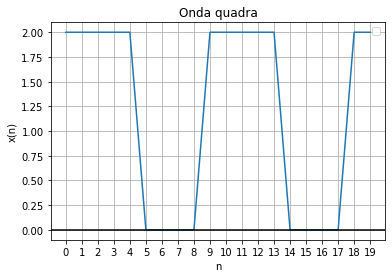

In [9]:
n = np.arange(0.0, 20).astype(int)
x_n = calc_x_n(n, N, A, L)
plt.plot(n, x_n)
plt.title('Onda quadra')
plt.xlabel('n')
plt.ylabel('x(n)')
plt.xticks(n)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.legend(loc='upper right')
plt.show()

Come possiamo vedere dal seguente plot, l'onda quadra viene approssimata sempre meglio man mano che si sommano gli esponenziali complessi.

C:\Users\Giobi\AppData\Local\Continuum\anaconda3\envs\tesi\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


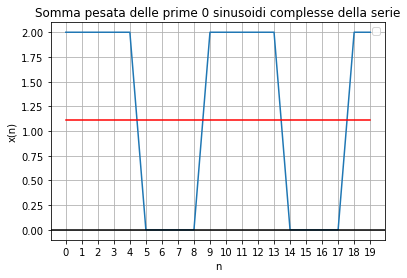

No handles with labels found to put in legend.


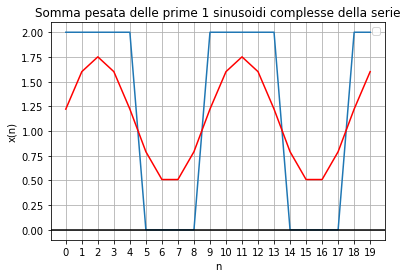

No handles with labels found to put in legend.


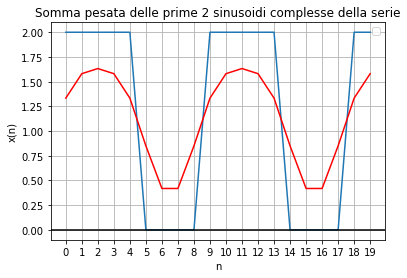

No handles with labels found to put in legend.


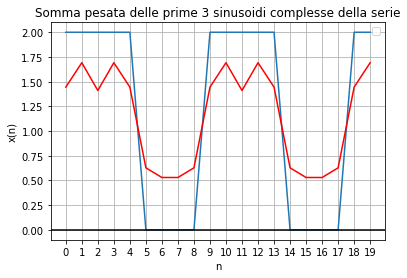

No handles with labels found to put in legend.


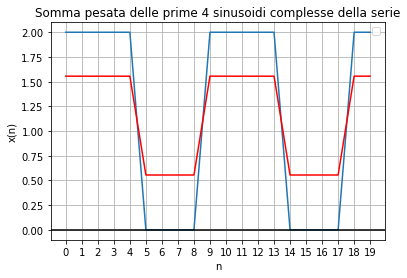

No handles with labels found to put in legend.


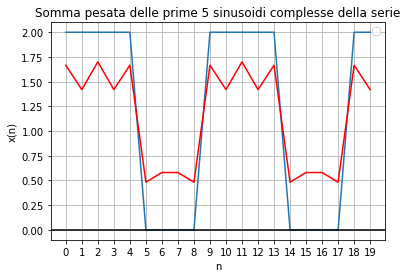

No handles with labels found to put in legend.


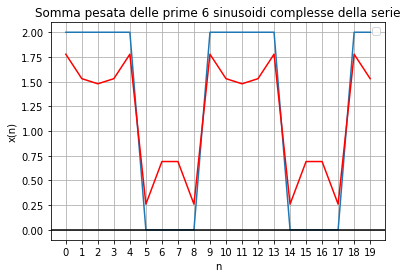

No handles with labels found to put in legend.


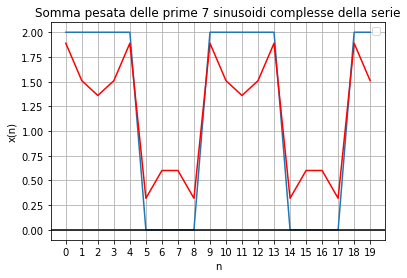

No handles with labels found to put in legend.


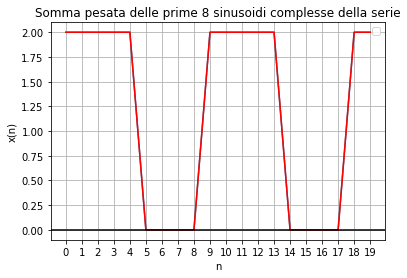

In [10]:
x_complex_sum = 0
for k in range(0, len(c_k)):
    x_complex_k = c_k[k]*(np.cos(2*np.pi*k*n/N) + 1j*np.sin(2*np.pi*k*n/N))
    x_complex_sum += x_complex_k
    plt.plot(n, x_n)
    plt.plot(n, x_complex_sum, 'r')
    plt.title("Somma pesata delle prime {} sinusoidi complesse della serie".format(k))
    plt.xlabel('n')
    plt.ylabel('x(n)')
    plt.xticks(n)
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.legend(loc='upper right')
    plt.show()

In [60]:
f_m4 = -4/N
f_m3 = -3/N
f_m2 = -2/N
f_m1 = -1/N
freqs = [f_m4, f_m3,f_m2,f_m1]
for i in range(int((N-1)/2)+1):
    freqs.append(i/N)

In [61]:
c_km4 = c_k[-4]
c_km3 = c_k[-3]
c_km2 = c_k[-2]
c_km1 = c_k[-1]
c_k_ = [c_km4, c_km3, c_km2, c_km1]
for i in range(int((N-1)/2)+1):
    c_k_.append(c_k[i])

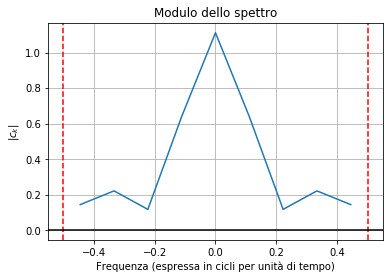

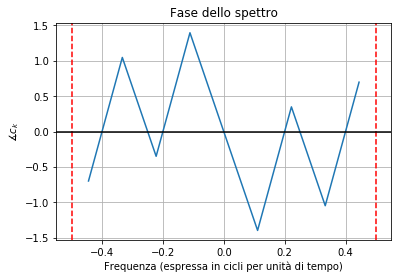

In [62]:
plt.plot(freqs, [abs(i) for i in c_k_])
plt.axvline(x=-0.5, color='r', ls='--')
plt.axvline(x=0.5, color='r', ls='--')
plt.title('Spettro di ampiezza')
plt.xlabel('Frequenza (espressa in cicli per unità di tempo)')
plt.ylabel('$|c_k|$')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

plt.plot(freqs, [cmath.phase(i) for i in c_k_])
plt.axvline(x=-0.5, color='r', ls='--')
plt.axvline(x=0.5, color='r', ls='--')
plt.title('Spettro di fase')
plt.xlabel('Frequenza (espressa in cicli per unità di tempo)')
plt.ylabel('$\measuredangle c_k$')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

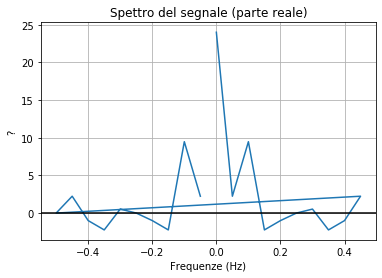

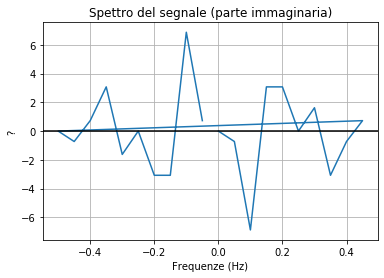

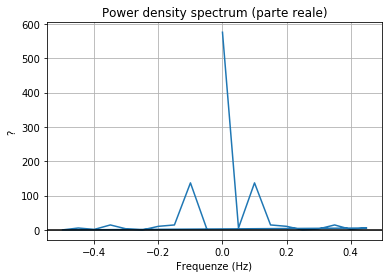

In [126]:
ck = fft(x_n)
freqs = fftfreq(len(x_n), 1.0/fs)
plt.plot(freqs, ck.real)
plt.title('Spettro di frequenza (parte reale)')
plt.xlabel('Frequenze (Hz)')
plt.ylabel('?')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()
plt.plot(freqs, ck.imag)
plt.title('Spettro di frequenza (parte immaginaria)')
plt.xlabel('Frequenze (Hz)')
plt.ylabel('?')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()
power_density_spectrum = np.square(np.abs(ck))
freqs = fftfreq(len(x_complex), 1.0/fs)
plt.plot(freqs, power_density_spectrum.real)
plt.title('Power density spectrum (parte reale)')
plt.xlabel('Frequenze (Hz)')
plt.ylabel('?')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

### DA FARE 
- Cerca di capire come mai gli esempi 1 e 2 su Python delle serie di Fourier non tornano.
- Rispondere alla domanda nel paragrafo "Potenza del segnale di segnali periodici" sull'Energia di un segnale periodico. 
- Mettere il nome agli assi y sui grafici negli esempi del paragrafo "Serie di Fourier per segnali discreti periodici" e nell'esempio "Esempio - Power density spectrum".